In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re


In [36]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [37]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [38]:
df['Rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [39]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [40]:
df=df[['Review Text','Rating']]

In [41]:
df.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [42]:
df.isna().sum()

Review Text    845
Rating           0
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22641 non-null  object
 1   Rating       22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [45]:
df.duplicated().sum()

7

In [46]:
df.drop_duplicates(inplace=True,keep='first')

In [47]:
df.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


<Axes: xlabel='Rating', ylabel='count'>

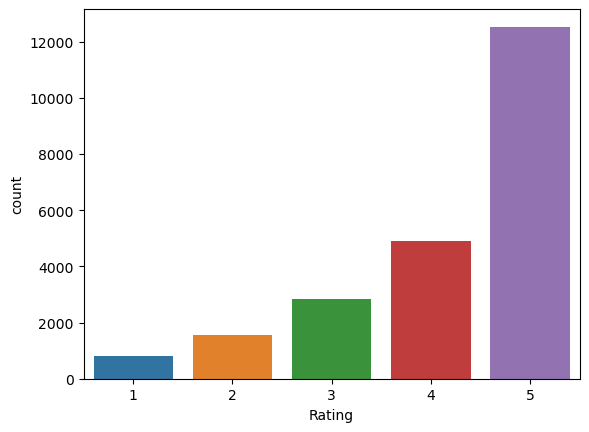

In [48]:
sns.countplot(x=df['Rating'])

In [49]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [50]:
def preprocess(sentence):
    text=re.sub(r'[^a-zA-Z0-9]',' ',sentence).split()
    words=[x.lower() for x in text if x not in stopwords.words('english')]
    lemma=WordNetLemmatizer()
    word=[lemma.lemmatize(word,'v') for word  in words]
    word=' '.join(word)
    return word

In [51]:
df['Review Text']=df['Review Text'].apply(preprocess)

In [52]:
for i in range(10):
    print(df['Review Text'][i])
    print()

absolutely wonderful silky sexy comfortable

love dress sooo pretty happen find store glad bc never would order online bc petite buy petite 5 8 love length hit little knee would definitely true midi someone truly petite

i high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper c

i love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment

this shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt

i love tracy reese dress one petite 5 feet tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress

i aded basket ht

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(df['Review Text'])

In [54]:
y=df['Rating']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [57]:
x_train.shape

(16975, 11322)

In [58]:
y_train.shape

(16975,)

In [61]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [62]:
model.score(x_train,y_train)

0.9136966126656848

In [63]:
y_pred=model.predict(x_test)

In [64]:
from sklearn import metrics

In [65]:
metrics.accuracy_score(y_test,y_pred)

0.6409259586499382

<Axes: >

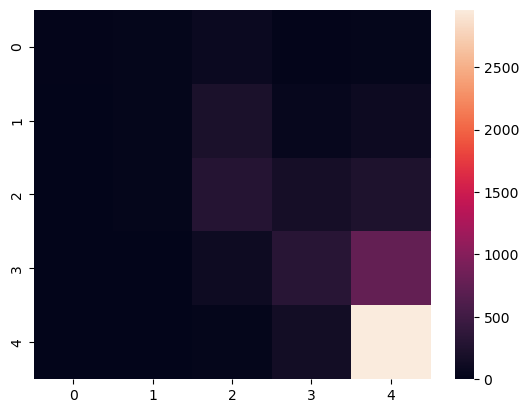

In [66]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred))

In [67]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.09      0.15       182
           2       0.33      0.08      0.13       401
           3       0.40      0.40      0.40       732
           4       0.46      0.27      0.34      1205
           5       0.72      0.94      0.82      3139

    accuracy                           0.64      5659
   macro avg       0.48      0.36      0.37      5659
weighted avg       0.59      0.64      0.59      5659

